## I. Introduction

Name    : Theo Nugraha

Batch   : RMT-021

Deployment Link : [HUGGING FACE - Credit Card Fraud Detection](https://huggingface.co/spaces/nugrahatheo/Credit_Card_Fraud_Detection)

### I.I. Project Background

I am a data scientist working for one of the biggest banks in the world. I was asked to create a project to create a machine learning to detect fraud on credit cards. I am allowed to use any algorithm as long as the result can be optimized. However, in the end I have to determine the best algorithm to use by considering its advantages and disadvantages.

### I.II. About Dataset

[**SOURCE DATASET**](https://www.kaggle.com/datasets/kartik2112/fraud-detection)

This dataset contains credit card transaction data from January 1, 2019 to December 31, 2020. It includes credit cards of 1000 customers who made transactions with 800 merchants.

Features in this dataset include:



### I.III. Objective

This project aims to create machine learning to detect credit card fraud.

## II. Import Library

In [1]:
#Import Library

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
import json

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from imblearn.under_sampling import NearMiss

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV, cross_val_score


import warnings
warnings.filterwarnings('ignore')

## III. Data Loading

In [2]:
# Data Loading
data_1 = pd.read_csv('fraudTrain.csv')
data_2 = pd.read_csv('fraudTest.csv')

# Combining the train and test datasets for data cleaning and data visulization
df = pd.concat([data_1, data_2], axis = 0)
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [3]:
# Resetting the index
df.reset_index(inplace = True)

This dataset has 23 columns or features and 1,852,394 rows of data.

In [4]:
# Save file
# df.to_csv("data.csv", index=False)

In [5]:
# Displays the top 10 data

df.head(10)

,index,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
5,5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,...,40.3750,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0
6,6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,...,37.9931,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0
7,7,7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,...,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0
8,8,8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,...,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0
9,9,9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,...,36.5220,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0


In [6]:
# Display the bottom 10 data

df.tail(10)

,index,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1852384,555709,555709,2020-12-31 23:57:18,30344654314976,"fraud_Larkin, Stracke and Greenfelder",entertainment,46.71,Christine,Johnson,F,...,39.8127,-120.6405,1725,Chartered legal executive (England and Wales),1967-05-27,a7105564935ea3977dc61ff9ced3bf5e,1388534238,38.963543,-120.457121,0
1852385,555710,555710,2020-12-31 23:57:50,3524574586339330,"fraud_Heathcote, Yost and Kertzmann",shopping_net,29.56,Ashley,Cabrera,F,...,27.6330,-80.4031,105638,"Librarian, public",1986-05-07,9fc9f6f9be3182d519a61a119cf97199,1388534270,27.593881,-80.855092,0
1852386,555711,555711,2020-12-31 23:57:56,341546199006537,fraud_Schmidt-Larkin,home,12.68,Mark,Brown,M,...,64.7556,-165.6723,145,"Administrator, education",1939-11-09,a8310343c189e4a5b6316050d2d6b014,1388534276,65.623593,-165.186033,0
1852387,555712,555712,2020-12-31 23:58:04,501802953619,"fraud_Pouros, Walker and Spencer",kids_pets,13.02,Robert,Flores,M,...,41.5403,-122.9366,308,Call centre manager,1958-09-20,bd7071fd5c9510a5594ee196368ac80e,1388534284,41.973127,-123.553032,0
1852388,555713,555713,2020-12-31 23:58:34,3523843138706408,"fraud_Prosacco, Kreiger and Kovacek",home,17.00,Grace,Williams,F,...,32.6176,-86.9475,1412,Drilling engineer,1970-11-20,6d04313bfe4b661b8ca2b6a499a320fe,1388534314,32.164145,-87.539669,0
1852389,555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
1852390,555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
1852391,555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
1852392,555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0
1852393,555718,555718,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,...,35.6665,-97.4798,116001,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0


In [7]:
# Duplicate Dataset

data_backup = df.copy()

In [8]:
# Check Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   index                  int64  
 1   Unnamed: 0             int64  
 2   trans_date_trans_time  object 
 3   cc_num                 int64  
 4   merchant               object 
 5   category               object 
 6   amt                    float64
 7   first                  object 
 8   last                   object 
 9   gender                 object 
 10  street                 object 
 11  city                   object 
 12  state                  object 
 13  zip                    int64  
 14  lat                    float64
 15  long                   float64
 16  city_pop               int64  
 17  job                    object 
 18  dob                    object 
 19  trans_num              object 
 20  unix_time              int64  
 21  merch_lat              float64
 22  merch_long        

In this dataset, there are 24 columns with 5 columns of float data type, 7 columns of integer data type and 12 colums of object data type.

In [9]:
# Check Missing Value

df.isnull().sum()

index                    0
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

There is no missing value in this dataset

In [10]:
# Duplication Check 

df.duplicated().sum()

0

Based on the duplication check, there are no duplicate row.

In [11]:
# Cardinality Check

print('Shape of Dataset : ', df.shape)
print('')

for col in df.columns.tolist():
  print('Col : ', col)
  print('Length Unique Value : ', df[col].unique())
  print('')

Shape of Dataset :  (1852394, 24)

Col :  index
Length Unique Value :  [      0       1       2 ... 1296672 1296673 1296674]

Col :  Unnamed: 0
Length Unique Value :  [      0       1       2 ... 1296672 1296673 1296674]

Col :  trans_date_trans_time
Length Unique Value :  ['2019-01-01 00:00:18' '2019-01-01 00:00:44' '2019-01-01 00:00:51' ...
 '2020-12-31 23:59:15' '2020-12-31 23:59:24' '2020-12-31 23:59:34']

Col :  cc_num
Length Unique Value :  [   2703186189652095        630423337322      38859492057661
    3534093764340240     375534208663984    4767265376804500
      30074693890476    6011360759745864    4922710831011201
    2720830304681674       4642894980163     377234009633447
     180042946491150    5559857416065248    3514865930894695
    6011999606625827    6011860238257910    3565423334076143
    2348245054386329 4956828990005111019 4469777115158234880
    2305336922781618     180048185037117        630441765090
 4428780983793657331     343464013864032     374930071163758


In [12]:
# Cardinality Check

print('Shape of Dataset : ', df.shape)
print('')

for col in df.columns.tolist():
  print('Col : ', col)
  print('Length Unique Value : ', df[col].nunique())
  print('')

Shape of Dataset :  (1852394, 24)

Col :  index
Length Unique Value :  1296675

Col :  Unnamed: 0
Length Unique Value :  1296675

Col :  trans_date_trans_time
Length Unique Value :  1819551

Col :  cc_num
Length Unique Value :  999

Col :  merchant
Length Unique Value :  693

Col :  category
Length Unique Value :  14

Col :  amt
Length Unique Value :  60616

Col :  first
Length Unique Value :  355

Col :  last
Length Unique Value :  486

Col :  gender
Length Unique Value :  2

Col :  street
Length Unique Value :  999

Col :  city
Length Unique Value :  906

Col :  state
Length Unique Value :  51

Col :  zip
Length Unique Value :  985

Col :  lat
Length Unique Value :  983

Col :  long
Length Unique Value :  983

Col :  city_pop
Length Unique Value :  891

Col :  job
Length Unique Value :  497

Col :  dob
Length Unique Value :  984

Col :  trans_num
Length Unique Value :  1852394

Col :  unix_time
Length Unique Value :  1819583

Col :  merch_lat
Length Unique Value :  1754157

Col :  me

Based on the cardinality check, the `gender` feature there are F and M, that are not listed in the categorical index

## IV. Exploratory Data Analysis (EDA)

### IV.I. Basic Statistic Checking

In [13]:
# Check Basic Statistic

df.describe()

,index,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,5.371934e+05,5.371934e+05,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,3.669110e+05,3.669110e+05,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,0.000000e+00,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,2.315490e+05,2.315490e+05,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,4.630980e+05,4.630980e+05,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,8.335758e+05,8.335758e+05,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,1.296674e+06,1.296674e+06,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


Based on the basic statistics check above, there are several findings, namely:
- Based on the distribution, `amt` and `city_pop` appear to be no fairly symmetrical. This is because the mean and median (50th percentile) values are no close.

### IV.II. Plotting

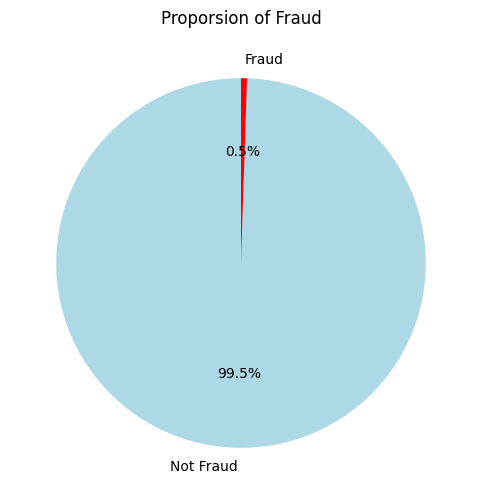

In [14]:
# Pie chart `is_fraud`

fraud = df["is_fraud"].value_counts()

# Make pie chart
plt.figure(figsize=(6, 6))
plt.pie(fraud, labels=["Not Fraud", "Fraud"], autopct="%1.1f%%", startangle=90, colors=["lightblue", "red"])
plt.title("Proporsion of Fraud")
plt.show()

Based on the diagram above, we can understand that the fraud of data in class 0 (Not Fraud) is more than class 1 (Fraud).

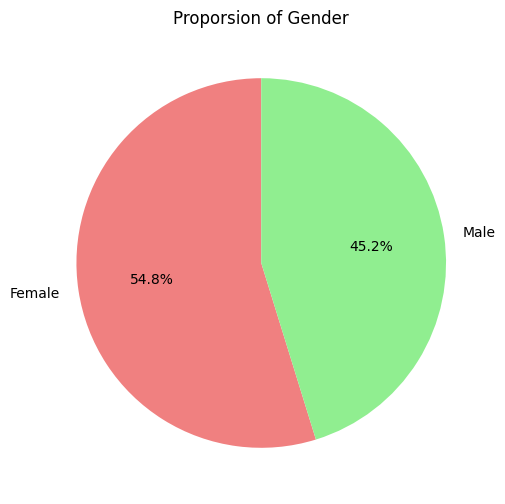

In [15]:
# Pie chart `gender`
fraud = df["gender"].value_counts()

# Make pie chart
plt.figure(figsize=(6, 6))
plt.pie(fraud, labels=["Female", "Male"], autopct="%1.1f%%", startangle=90, colors=["lightcoral", "lightgreen"])
plt.title("Proporsion of Gender")
plt.show()

Based on the diagram above, we can understand that Female customers is more than Male customers.

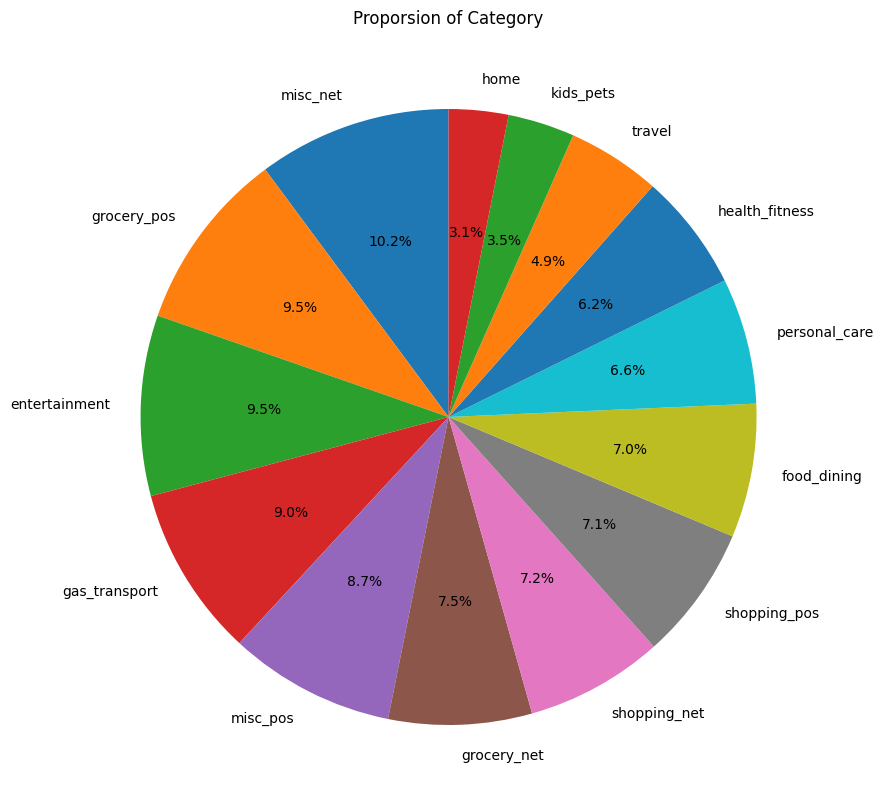

In [16]:
# Pie chart `category`

fraud = df["category"].value_counts()

# Make pie chart
plt.figure(figsize=(10, 10))
plt.pie(fraud, labels=['misc_net', 'grocery_pos', 'entertainment', 'gas_transport', 'misc_pos',
                        'grocery_net', 'shopping_net', 'shopping_pos', 'food_dining', 'personal_care',
                        'health_fitness', 'travel', 'kids_pets', 'home'], autopct="%1.1f%%", startangle=90)
plt.title("Proporsion of Category")
plt.show()

Based on the diagram above, we can see that the `misc_net` category has the largest proportion in this dataset.

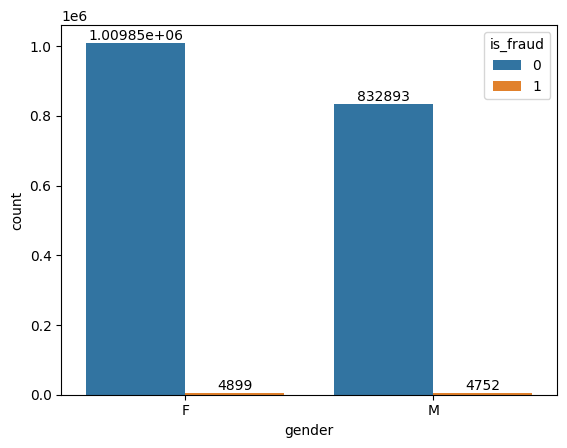

In [17]:
# Count Plot `is_fraud` based on `gender`

gender_isfraud = sns.countplot(data=df, x="gender", hue="is_fraud")

for container in gender_isfraud.containers:
    gender_isfraud.bar_label(container)

plt.show()

Based on the diagram above, we can know that:
1. The number of fraud with female gender is more than the number of fraud with male gender.
2. The number of non-fraud with female gender is more than the number of non-fraud with male gender.

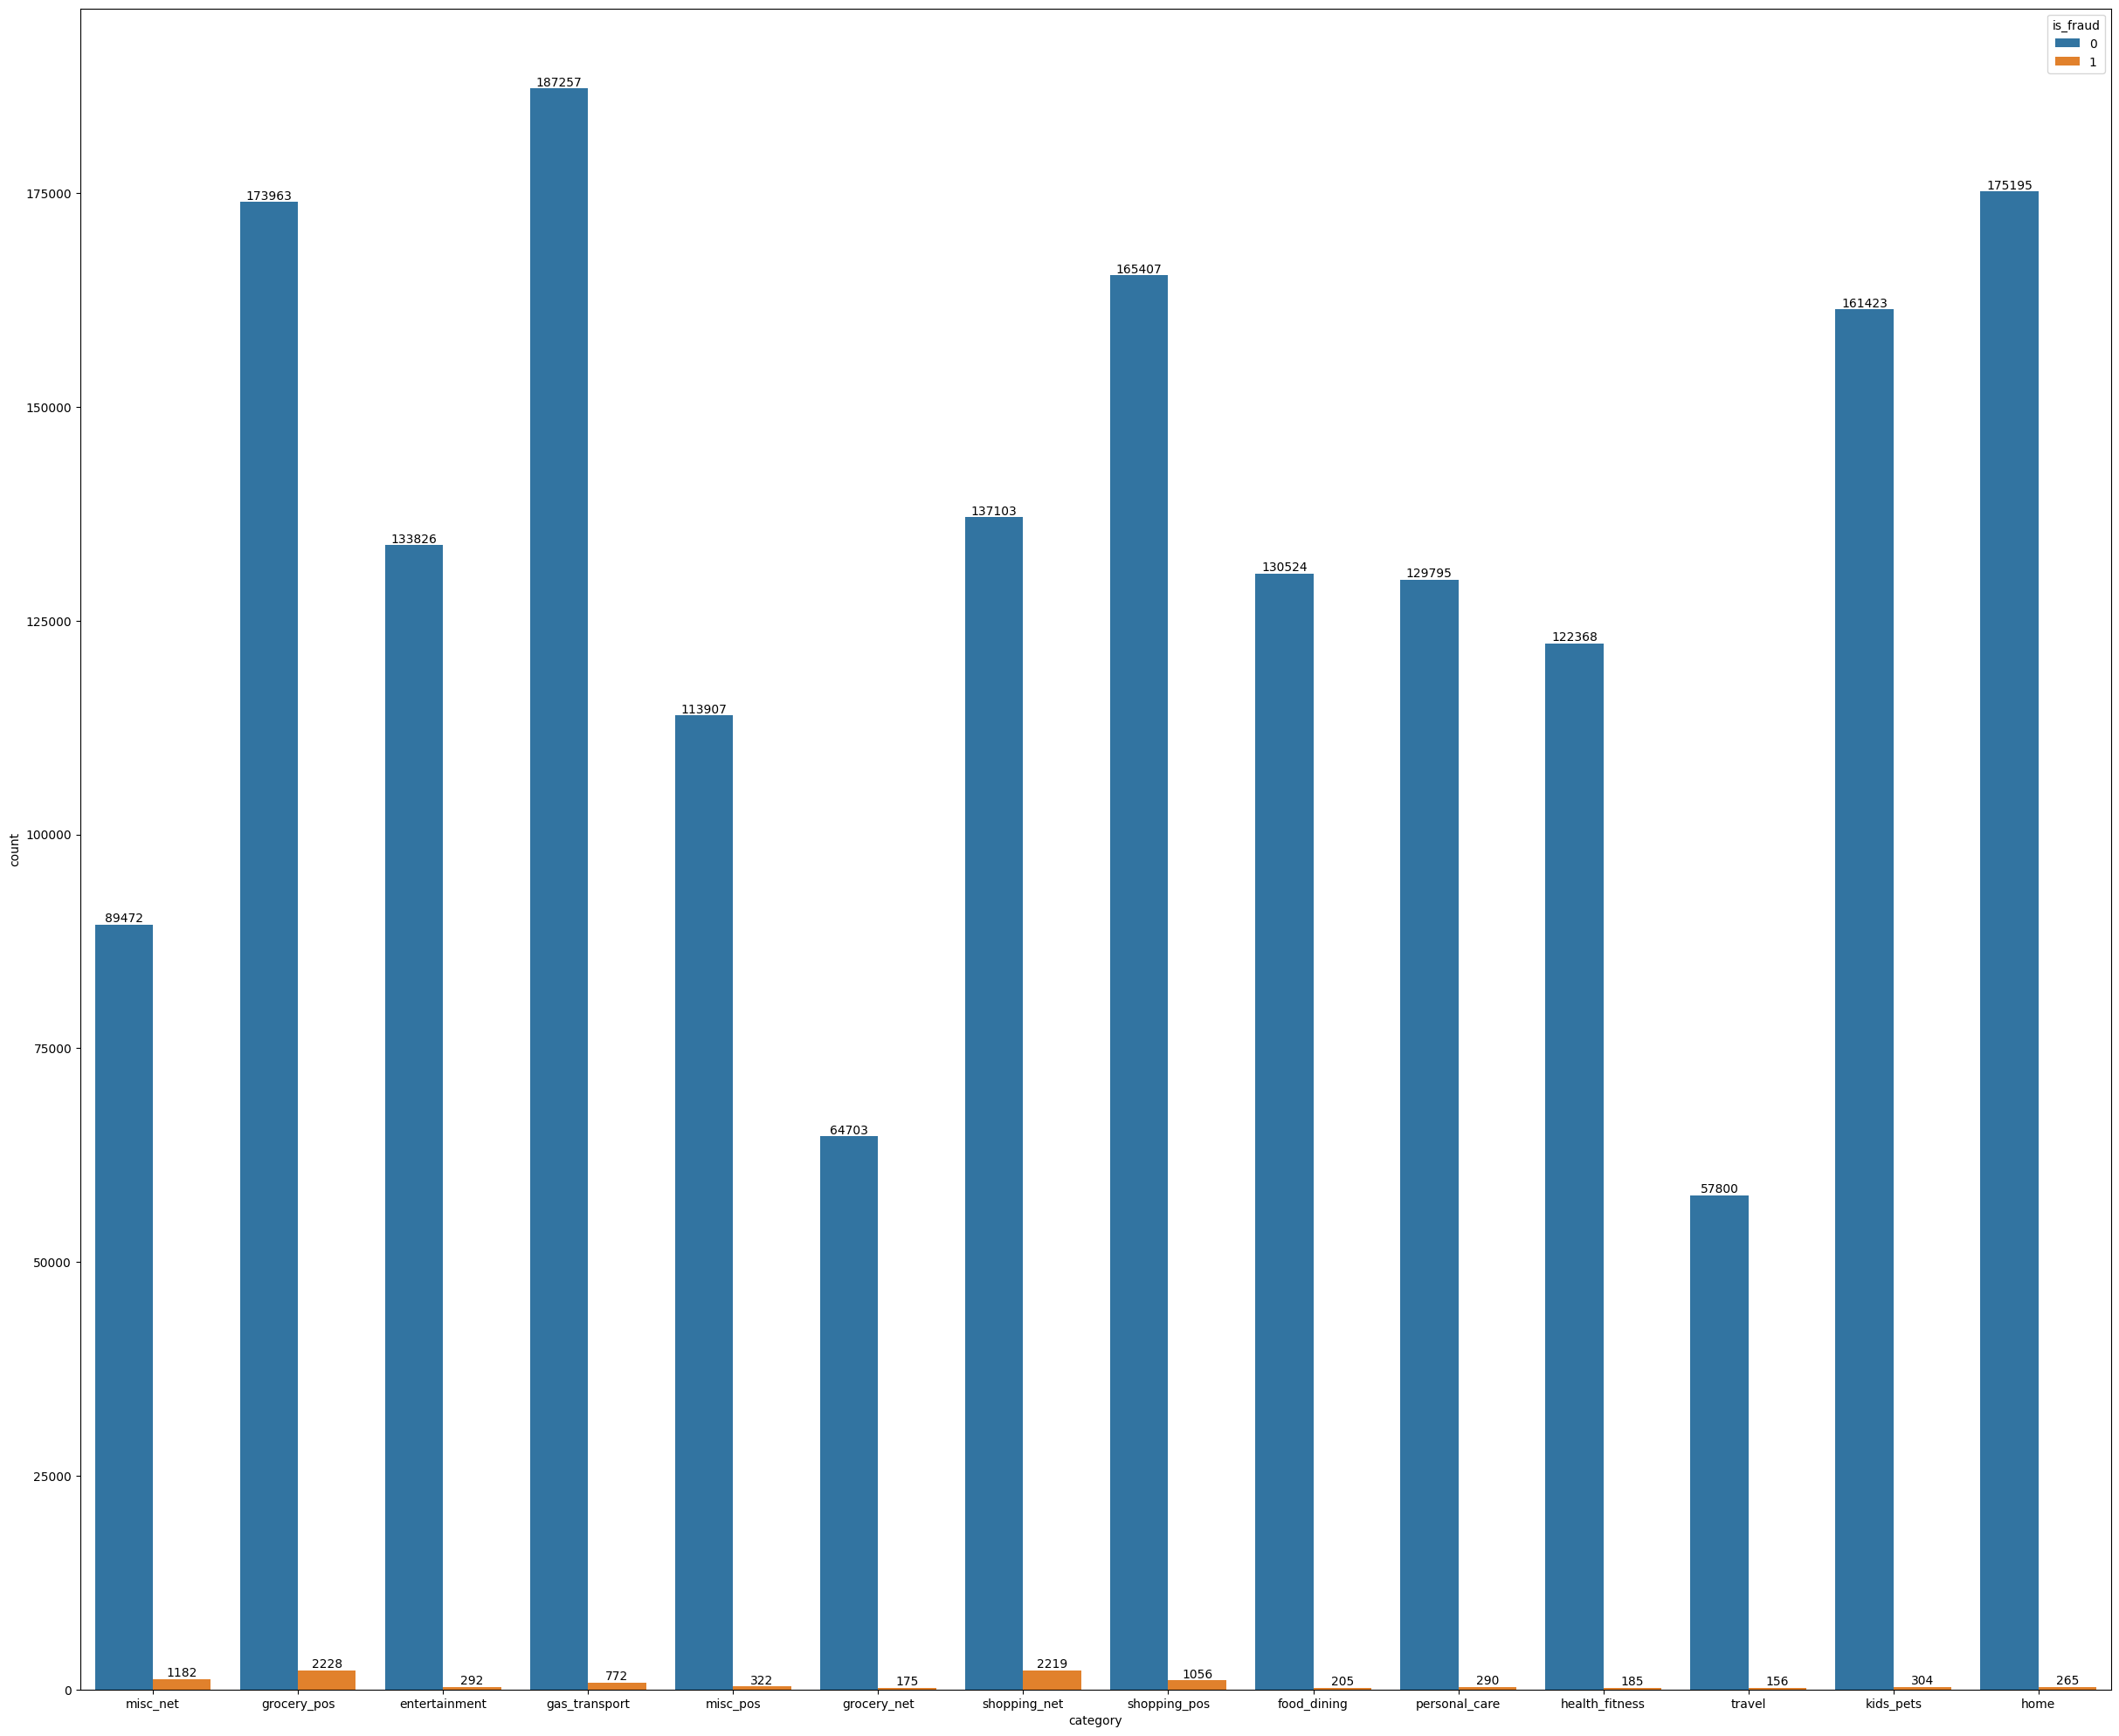

In [18]:
# Count Plot `is_fraud` based on `category`

plt.figure(figsize=(30, 25))
category_isfraud = sns.countplot(data=df, x="category", hue="is_fraud")
for container in category_isfraud.containers:
    category_isfraud.bar_label(container)

plt.show()

Based on the diagram above, we can see that the most fraud cases occurred in the `grocery_pos` category, with 2228 cases and then `shopping_pos`, with 2219 cases.

### IV.III. Correlation Feature Check

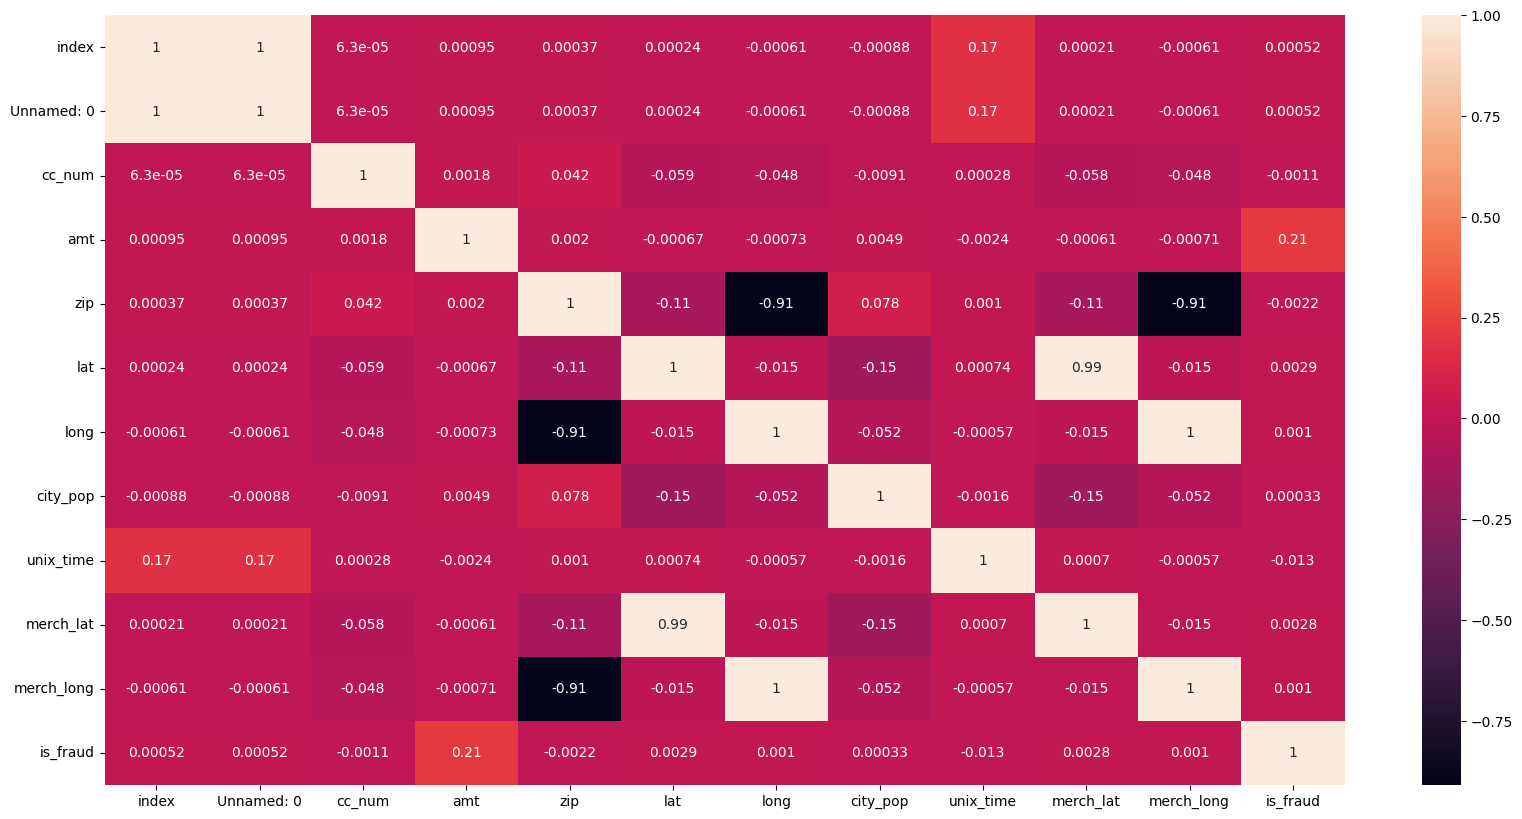

In [19]:
# Correlation feature checking

fig,ax = plt.subplots(figsize=[20,10])

corr = df.corr()

ax = sns.heatmap(corr,annot=True)
plt.show()

Based on the correlation test of all numeric features against the `is_fraud` feature, we can conclude that the greater the `amt`, the greater the chance of `is_fraud`. This indicates a strong positive correlation between the `amt` feature and the `is_fraud` feature.

## V. Feature Engineering

Before I do the data splitting, the first thing I will do is:
1. Rename the `is_fraud` feature to `result` to make it easier and more concise.

In [20]:
# Rename feature / column name

df.rename(columns={"is_fraud": "result"}, inplace=True)
df.head(3)

,index,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,result
0,0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


### V.I. Split between X (Features) and y (Target)

In [21]:
# Splitting between X and y

X = df.drop(['result'], axis=1)
y = df['result']

X.head(3)

,index,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,...,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long
0,0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,...,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315
1,1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,...,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462
2,2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,...,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481


In [22]:
# Show shape on X and y

print(X.shape)
print(y.shape)

(1852394, 23)
(1852394,)


### V.II. Feature Selection

In this case, we try to select the features `category`, `amt`, `gender`, `state` and `city_pop` because we feel that the other features do not matter much. This reason is supported by the correlation test and cardinality test.

In [23]:
# Remove feature 
X.drop(['index', 'Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'first', 'last', 
        'street', 'city', 'job', 'dob', 'trans_num', 'unix_time', 'zip', 'lat', 'long', 'merch_lat', 'merch_long'], axis=1, inplace=True)
X

,category,amt,gender,state,city_pop
0,misc_net,4.97,F,NC,3495
1,grocery_pos,107.23,F,WA,149
2,entertainment,220.11,M,ID,4154
3,gas_transport,45.00,M,MT,1939
4,misc_pos,41.96,M,VA,99
...,...,...,...,...,...
1852389,health_fitness,43.77,M,MO,519
1852390,kids_pets,111.84,M,TX,28739
1852391,kids_pets,86.88,F,WA,3684
1852392,travel,7.99,M,ID,129


### V.III. Split between Numeric Columns and Category Columns

In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 5 columns):
 #   Column    Dtype  
---  ------    -----  
 0   category  object 
 1   amt       float64
 2   gender    object 
 3   state     object 
 4   city_pop  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 70.7+ MB


In [25]:
# Get Numeric Columns and Categorical Columns

num_columns     = X[['amt','city_pop']].columns.tolist()
cat_columns_1   = X[['category']].columns.tolist()
cat_columns_2   = X[['gender']].columns.tolist()
cat_columns_3   = X[['state']].columns.tolist()

In [26]:
# Split dataset based on column types

X_num = X[num_columns]
X_cat_1 = X[cat_columns_1]
X_cat_2 = X[cat_columns_2]
X_cat_3 = X[cat_columns_3]

- Columns that are numerical are `amt` and `city_pop`.
- Columns that are categorical are `category`, `gender` and `state`.

The numerical column will be scaled and the categorical column will be encoded.

### V.IV. Feature Scaling

In this step, I will use the MinMaxScaler because the average data distribution in `amt` and `city_pop` is not normal. This is evidenced by the distance between the mean and median values.

In [27]:
# Show basic statistic

X_num.describe()

,amt,city_pop
count,1.852394e+06,1.852394e+06
mean,7.006357e+01,8.864367e+04
std,1.592540e+02,3.014876e+05
min,1.000000e+00,2.300000e+01
25%,9.640000e+00,7.410000e+02
50%,4.745000e+01,2.443000e+03
75%,8.310000e+01,2.032800e+04
max,2.894890e+04,2.906700e+06


In [28]:
# Feature Scaling using MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X_num)
X_num_scaled = scaler.transform(X_num)
X_num_scaled

array([[1.37142936e-04, 1.19449117e-03],
       [3.66969625e-03, 4.33484697e-05],
       [7.56911555e-03, 1.42121054e-03],
       ...,
       [2.96670916e-03, 1.25951387e-03],
       [2.41468293e-04, 3.64677603e-05],
       [1.28264917e-03, 3.99005462e-02]])

### V.V. Feature Encoding

In this step, I will use OneHotEncoder because the data in categorical columns is ordinal.

In [29]:
# Feature Encoding using OneHotEncoder

OHE_1 = OneHotEncoder(sparse_output=False)

X_cat_enc_1 = OHE_1.fit_transform(X_cat_1[['category']])

feature_names_1 = OHE_1.get_feature_names_out(input_features=['category'])

X_cat_enc_1 = pd.DataFrame(X_cat_enc_1, columns=feature_names_1)
X_cat_enc_1  = pd.DataFrame(X_cat_enc_1, columns=feature_names_1)


In [30]:
# Feature Encoding using OneHotEncoder

OHE_2 = OneHotEncoder(sparse_output=False)

X_cat_enc_2 = OHE_2.fit_transform(X_cat_2[['gender']])

feature_names_2 = OHE_2.get_feature_names_out(input_features=['gender'])

X_cat_enc_2  = pd.DataFrame(X_cat_enc_2, columns=feature_names_2)
X_cat_enc_2  = pd.DataFrame(X_cat_enc_2, columns=feature_names_2)


In [31]:
# Feature Encoding using OneHotEncoder

OHE_3 = OneHotEncoder(sparse_output=False)

X_cat_enc_3 = OHE_3.fit_transform(X_cat_3[['state']])

feature_names_3 = OHE_3.get_feature_names_out(input_features=['state'])

X_cat_enc_3  = pd.DataFrame(X_cat_enc_3, columns=feature_names_3)
X_cat_enc_3  = pd.DataFrame(X_cat_enc_3, columns=feature_names_3)


### V.VI. Handling Missing Value

In [32]:
# Check missing value
X.isna().sum()

category    0
amt         0
gender      0
state       0
city_pop    0
dtype: int64

There is no missing value in this dataset.

### V.VII. Handling Outlier

In this section, we will check for outliers in the numeric features/columns.

In [33]:
# Make function to show histogram & boxplot

def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable],kde=True, bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

#### V.VII.I. Check Feature Scewness & Outlier on X using Histogram & Boxplot

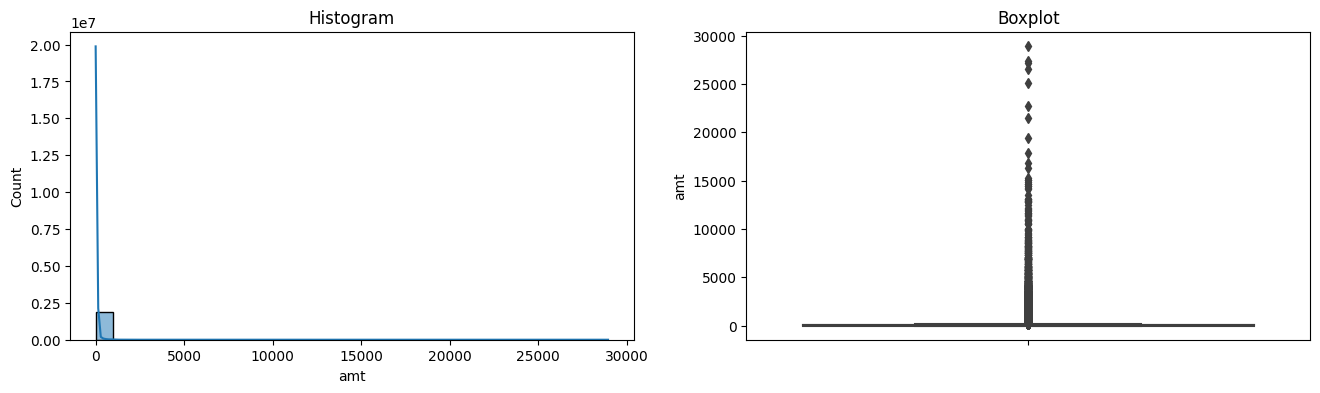


Skewness Value :  40.81280917629574


In [34]:
# Set value histogram & boxplot and show skewness from feature `amt`

diagnostic_plots(X, 'amt')
print('\nSkewness Value : ', X['amt'].skew())

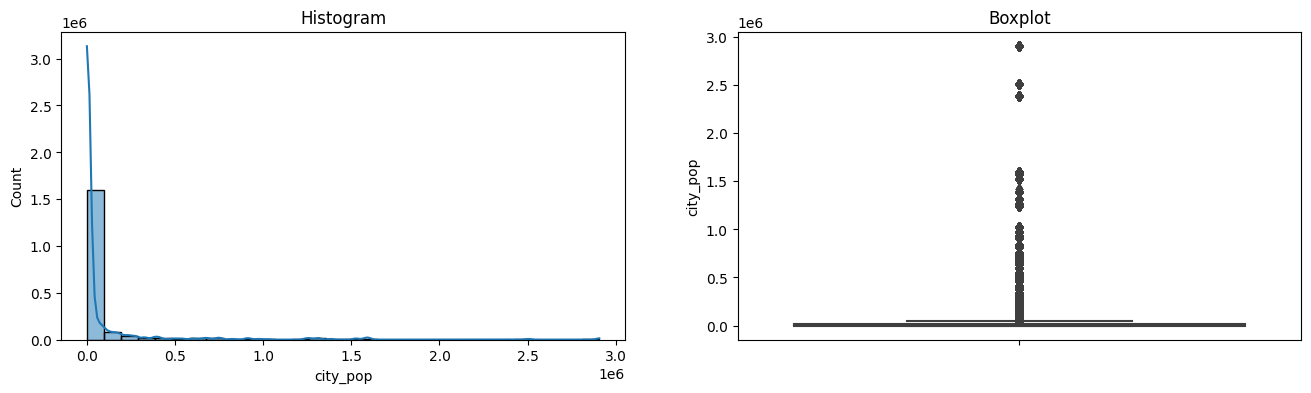


Skewness Value :  5.590804561529247


In [35]:
# Set value histogram & boxplot and show skewness from feature `city_pop`

diagnostic_plots(X, 'city_pop')
print('\nSkewness Value : ', X['city_pop'].skew())

Based on the histogram, boxplot and skewness level, we can know that there are outliers almost in all numeric features, with data distribution tending to gather on the left.

#### V.VII.II. Outlier Detection

Based on what we see through the histogram & boxplot above, I personally will not remove the outliers because I feel that I need all the data including the data included in the outliers and I feel that by removing and imputing the outliers, the data becomes impure. At least for this case.

### V.VIII. Concate between Numeric Columns and Categorical Columns

In [36]:
# Concate columns

X_final = np.concatenate([X_num_scaled, X_cat_enc_1, X_cat_enc_2, X_cat_enc_3], axis = 1)
X_final

array([[1.37142936e-04, 1.19449117e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.66969625e-03, 4.33484697e-05, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.56911555e-03, 1.42121054e-03, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.96670916e-03, 1.25951387e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.41468293e-04, 3.64677603e-05, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.28264917e-03, 3.99005462e-02, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [37]:
# Create dataframe of X_final

X_final_df = pd.DataFrame(X_final, columns = [num_columns + list(feature_names_1) + list(feature_names_2) + list(feature_names_3)])
X_final_df

,amt,city_pop,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,0.000137,0.001194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.003670,0.000043,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.007569,0.001421,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.001520,0.000659,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.001415,0.000026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1852389,0.001477,0.000171,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1852390,0.003829,0.009879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1852391,0.002967,0.001260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1852392,0.000241,0.000036,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### V.IX. Resampling

In this step, we will resample the data due to data imbalance between class 0 (No Fraud) and class 1 (Fraud). The resampling method we will use is UnderSampling, because if we do the OverSampling method, it will add a lot of data and the learning process will be too long.

In [38]:
# Resampling using UnderSampling
nm = NearMiss()
x_sampled, y_sampled = nm.fit_resample(X_final, y)

print('Data   : ', x_sampled.shape)
print('Labels : ', y_sampled.shape)

Data   :  (19302, 69)
Labels :  (19302,)


In [39]:

X_train, X_test, y_train, y_test = train_test_split(x_sampled, y_sampled, test_size = 0.2, random_state = 50)

print('Training Data Shape   : ', X_train.shape)
print('Training Labels Shape : ', y_train.shape)
print('Testing Data Shape    : ', X_test.shape)
print('Testing Labels Shape  : ', y_test.shape)

Training Data Shape   :  (15441, 69)
Training Labels Shape :  (15441,)
Testing Data Shape    :  (3861, 69)
Testing Labels Shape  :  (3861,)


### V.IX. Pipeline

In [40]:
num_pipeline = Pipeline([
        ('scaler', MinMaxScaler())
    ])

num = num_pipeline.fit_transform(X[['amt','city_pop']])

In [41]:
cat_1_pipeline = Pipeline([
        ('OHE_1', OneHotEncoder(sparse=False))
    ])

cat_1 = cat_1_pipeline.fit_transform(X[['category']])

In [42]:
cat_2_pipeline = Pipeline([
        ('OHE_2', OneHotEncoder(sparse=False))
    ])

cat_2 = cat_2_pipeline.fit_transform(X[['gender']])

In [43]:
cat_3_pipeline = Pipeline([
        ('OHE_3', OneHotEncoder(sparse=False))
    ])

cat_3 = cat_3_pipeline.fit_transform(X[['state']])

In [44]:
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, ['amt', 'city_pop']),
        ("cat_1", cat_1_pipeline, ['category']),
        ("cat_2", cat_2_pipeline, ['gender']),
        ("cat_3", cat_2_pipeline, ['state'])
    ])

X_pipe = full_pipeline.fit_transform(X)
X_pipe

array([[1.37142936e-04, 1.19449117e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.66969625e-03, 4.33484697e-05, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.56911555e-03, 1.42121054e-03, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.96670916e-03, 1.25951387e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.41468293e-04, 3.64677603e-05, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.28264917e-03, 3.99005462e-02, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

## VI. Model Definition

In this case, I will try to use 4 classification algorithms, namely: Logistic Regression, DecisionTreeClassifier, RandomForestClassifier and GradientBoostingClassifier.

In [45]:
# Training using Logistic Regression, DecisionTreeClassifier, RandomForestClassifier, GradientBoostingClassifier

lr  = LogisticRegression(random_state=50)
dtc = DecisionTreeClassifier(random_state=50)
rfc = RandomForestClassifier(random_state=50)
gbc = GradientBoostingClassifier(random_state=50)

## VII. Model Training

In [46]:
# Train the LogisticRegression model
lr.fit(X_train, y_train)

LogisticRegression(random_state=50)

In [47]:
# Train the DecisionTreeClassifier model
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=50)

In [48]:
# Train the RandomForestClassifier model
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=50)

In [49]:
# Train the GradientBoostingClassifier model
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=50)

## VIII. Model Evaluation

### VIII.I. Model Evaluation Result Checking

In [50]:
# Predict Train-set and Test-set on Logistic Regression Model

y_pred_train_log = lr.predict(X_train)
y_pred_test_log  = lr.predict(X_test)

In [51]:
# Classification Report of Logistic Regression Model

print('Classification Report of Logistic Regression Model\n')
print('Train')
print(classification_report(y_train,y_pred_train_log))
print('')
print('Test')
print(classification_report(y_test,y_pred_test_log))

Classification Report of Logistic Regression Model

Train
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7729
           1       0.96      0.90      0.93      7712

    accuracy                           0.94     15441
   macro avg       0.94      0.94      0.93     15441
weighted avg       0.94      0.94      0.93     15441


Test
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1922
           1       0.97      0.91      0.94      1939

    accuracy                           0.94      3861
   macro avg       0.94      0.94      0.94      3861
weighted avg       0.94      0.94      0.94      3861



In [52]:
# Predict Train-set and Test-set on DecisionTreeClassifier Model

y_pred_train_dtc = dtc.predict(X_train)
y_pred_test_dtc  = dtc.predict(X_test)

In [53]:
# Classification Report of DecisionTreeClassifier Model

print('Classification Report of DecisionTreeClassifier Model\n')
print('Train')
print(classification_report(y_train,y_pred_train_dtc))
print('')
print('Test')
print(classification_report(y_test,y_pred_test_dtc))

Classification Report of DecisionTreeClassifier Model

Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7729
           1       1.00      1.00      1.00      7712

    accuracy                           1.00     15441
   macro avg       1.00      1.00      1.00     15441
weighted avg       1.00      1.00      1.00     15441


Test
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1922
           1       0.95      0.95      0.95      1939

    accuracy                           0.95      3861
   macro avg       0.95      0.95      0.95      3861
weighted avg       0.95      0.95      0.95      3861



In [54]:
# Predict Train-set and Test-set on RandomForestClassifier Model

y_pred_train_rfc = rfc.predict(X_train)
y_pred_test_rfc  = rfc.predict(X_test)

In [55]:
# Classification Report of RandomForestClassifier Model

print('Classification Report of RandomForestClassifier Model\n')
print('Train')
print(classification_report(y_train,y_pred_train_rfc))
print('')
print('Test')
print(classification_report(y_test,y_pred_test_rfc))

Classification Report of RandomForestClassifier Model

Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7729
           1       1.00      1.00      1.00      7712

    accuracy                           1.00     15441
   macro avg       1.00      1.00      1.00     15441
weighted avg       1.00      1.00      1.00     15441


Test
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1922
           1       0.97      0.95      0.96      1939

    accuracy                           0.96      3861
   macro avg       0.96      0.96      0.96      3861
weighted avg       0.96      0.96      0.96      3861



In [56]:
# Predict Train-set and Test-set on GradientBoostingClassifier Model

y_pred_train_gbc = gbc.predict(X_train)
y_pred_test_gbc  = gbc.predict(X_test)

In [57]:
# Classification Report of GradientBoostingClassifier Model

print('Classification Report of GradientBoostingClassifier Model\n')
print('Train')
print(classification_report(y_train,y_pred_train_gbc))
print('')
print('Test')
print(classification_report(y_test,y_pred_test_gbc))

Classification Report of GradientBoostingClassifier Model

Train
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      7729
           1       0.98      0.93      0.96      7712

    accuracy                           0.96     15441
   macro avg       0.96      0.96      0.96     15441
weighted avg       0.96      0.96      0.96     15441


Test
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      1922
           1       0.98      0.93      0.96      1939

    accuracy                           0.96      3861
   macro avg       0.96      0.96      0.96      3861
weighted avg       0.96      0.96      0.96      3861



Based on the Classification Report results above, we can see that DecisionTreeClassifier and RandomForestClassifier get the highest rank with very precise results or 100% correct. Next, let's do a cross validation test with the 4 models above so that we can be more confident to determine which is the best model for this credit card fraud case.

### VIII.II. Cross Validation Model Checking

In [58]:
# Cross Validation using `cross_val_score` - Logistic Regression

f1_score_train_cross_val = cross_val_score(lr, 
                                        X_train, 
                                        y_train, 
                                        cv=10, 
                                        scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_score_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_score_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_score_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_score_train_cross_val.mean()-f1_score_train_cross_val.std()) , '-', (f1_score_train_cross_val.mean()+f1_score_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.92669805 0.92620176 0.92359703 0.93648649 0.93594066 0.93147039
 0.93010753 0.93552632 0.94006734 0.93315508]
F1 Score - Mean - Cross Validation :  0.9319250637916332
F1 Score - Std - Cross Validation  :  0.005006540624217445
F1 Score - Range of Test-Set       :  0.9269185231674157 - 0.9369316044158507


In [59]:
# Cross Validation using `cross_val_score` - DecisionTreeClassifier

f1_score_train_cross_val = cross_val_score(dtc, 
                                        X_train, 
                                        y_train, 
                                        cv=10, 
                                        scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_score_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_score_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_score_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_score_train_cross_val.mean()-f1_score_train_cross_val.std()) , '-', (f1_score_train_cross_val.mean()+f1_score_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.9459987  0.9431744  0.94440811 0.95169713 0.95629485 0.94109948
 0.94408322 0.94641704 0.94201954 0.93737895]
F1 Score - Mean - Cross Validation :  0.9452571421901341
F1 Score - Std - Cross Validation  :  0.005113418203758127
F1 Score - Range of Test-Set       :  0.940143723986376 - 0.9503705603938922


In [60]:
# Cross Validation using `cross_val_score` - RandomForestClassifier

f1_score_train_cross_val = cross_val_score(rfc, 
                                        X_train, 
                                        y_train, 
                                        cv=10, 
                                        scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_score_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_score_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_score_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_score_train_cross_val.mean()-f1_score_train_cross_val.std()) , '-', (f1_score_train_cross_val.mean()+f1_score_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.96031746 0.96452037 0.95300261 0.96452037 0.96973684 0.96179183
 0.95657895 0.95618051 0.95213115 0.95926413]
F1 Score - Mean - Cross Validation :  0.9598044211816232
F1 Score - Std - Cross Validation  :  0.005256599501892345
F1 Score - Range of Test-Set       :  0.9545478216797308 - 0.9650610206835156


In [61]:
# Cross Validation using `cross_val_score` - GradientBoostingClassifier

f1_score_train_cross_val = cross_val_score(gbc, 
                                        X_train, 
                                        y_train, 
                                        cv=10, 
                                        scoring='f1')

print('F1 Score - All - Cross Validation  : ', f1_score_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_score_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_score_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_score_train_cross_val.mean()-f1_score_train_cross_val.std()) , '-', (f1_score_train_cross_val.mean()+f1_score_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.948      0.94786096 0.94235925 0.96005326 0.95727637 0.94973545
 0.95180723 0.9547541  0.94983278 0.95351926]
F1 Score - Mean - Cross Validation :  0.9515198651944438
F1 Score - Std - Cross Validation  :  0.004860256317937704
F1 Score - Range of Test-Set       :  0.946659608876506 - 0.9563801215123815


Based on these results, the RandomForestClassifier model has the highest average F1 Score among all tested models, as well as having a relatively stable F1 Score range. In addition, the low standard deviation indicates that the model is consistent in its performance across cross-validations.

After this, let's try to do hyperparameter tuning using GridSearchCV and see the results whether hyperparameter tuning can provide better results, the same or even worsen the results of the four models above.

### VIII.III. Hyperparameter Tuning

#### VIII.III.I. Logistic Regression

In [62]:
# Define Hyperparameters

param_grid_lr = [    
                {
                'penalty' : ['l1', 'l2', 'none'],
                'C' : np.logspace(-4, 4, 10),
                'solver' : ['lbfgs','liblinear'],
                'max_iter' : [100, 1000]
                }
]

In [63]:
# Train with Grid Search

grid_lr = GridSearchCV(estimator=LogisticRegression(), 
                        param_grid=param_grid_lr)

grid_lr.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid=[{'C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                          'max_iter': [100, 1000],
                          'penalty': ['l1', 'l2', 'none'],
                          'solver': ['lbfgs', 'liblinear']}])

In [64]:
# Print best parameter after tuning
print(grid_lr.best_params_)

# Print how our model looks after hyper-parameter tuning
print(grid_lr.best_estimator_)

{'C': 0.0001, 'max_iter': 100, 'penalty': 'none', 'solver': 'lbfgs'}
LogisticRegression(C=0.0001, penalty='none')


In [65]:
# Predict using selected hyper-parameter
grid_pred_train_lr = grid_lr.predict(X_train)

# Print classification report
print(classification_report(y_train, grid_pred_train_lr))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7729
           1       0.97      0.91      0.94      7712

    accuracy                           0.94     15441
   macro avg       0.94      0.94      0.94     15441
weighted avg       0.94      0.94      0.94     15441



In [66]:
# Predict using selected hyper-parameter
grid_pred_test_lr = grid_lr.predict(X_test)

# Print classification report
print(classification_report(y_test, grid_pred_test_lr))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1922
           1       0.98      0.92      0.95      1939

    accuracy                           0.95      3861
   macro avg       0.95      0.95      0.95      3861
weighted avg       0.95      0.95      0.95      3861



Confusion Matrix 


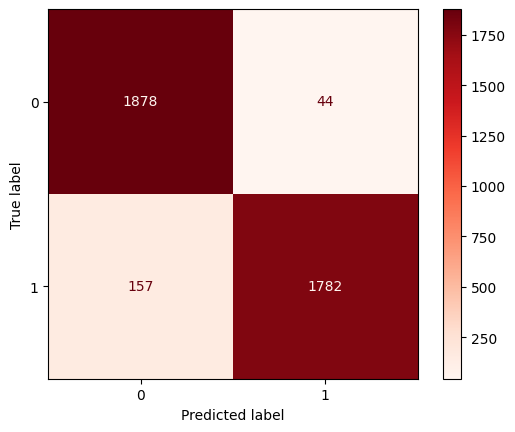

In [67]:
# Confussion Matrix
print('Confusion Matrix \n', ConfusionMatrixDisplay.from_estimator(grid_lr, X_test, y_test, cmap='Reds'));

#### VIII.III.II. DecisionTreeClassifier

In [68]:
param_grid_dtc = [
                    {
                    'max_depth'         : [2, 3, 5, 10, 20],
                    'min_samples_leaf'  : [5, 10, 20, 50, 100],
                    'criterion'         : ["gini", "entropy"]
                    }
                ]

In [69]:
# Train with Grid Search

grid_dtc = GridSearchCV(estimator=DecisionTreeClassifier(), 
                        param_grid=param_grid_dtc)

grid_dtc.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [2, 3, 5, 10, 20],
                          'min_samples_leaf': [5, 10, 20, 50, 100]}])

In [70]:
# Print best parameter after tuning
print(grid_dtc.best_params_)

# Print how our model looks after hyper-parameter tuning
print(grid_dtc.best_estimator_)

{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 5}
DecisionTreeClassifier(max_depth=20, min_samples_leaf=5)


In [71]:
# Predict using selected hyper-parameter
grid_pred_train_dtc = grid_dtc.predict(X_train)

# Print classification report
print(classification_report(y_train, grid_pred_train_dtc))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      7729
           1       0.99      0.95      0.97      7712

    accuracy                           0.97     15441
   macro avg       0.97      0.97      0.97     15441
weighted avg       0.97      0.97      0.97     15441



In [72]:
# Predict using selected hyper-parameter
grid_pred_test_dtc = grid_dtc.predict(X_test)

# Print classification report
print(classification_report(y_test, grid_pred_test_dtc))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1922
           1       0.98      0.95      0.96      1939

    accuracy                           0.96      3861
   macro avg       0.96      0.96      0.96      3861
weighted avg       0.96      0.96      0.96      3861



Confusion Matrix 


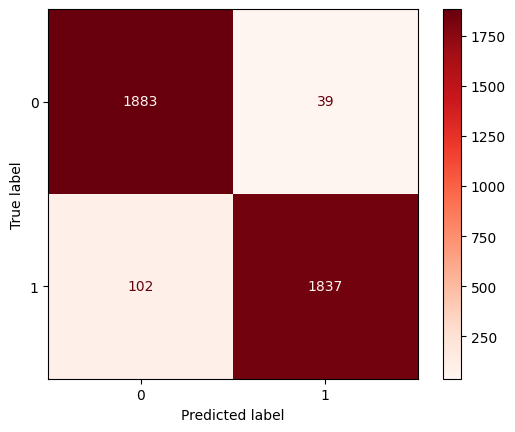

In [73]:
# Confussion Matrix
print('Confusion Matrix \n', ConfusionMatrixDisplay.from_estimator(grid_dtc, X_test, y_test, cmap='Reds'));

#### VIII.III.III. RandomForestClassifier

In [74]:
# Define Hyperparameters

param_grid_rf = {'n_estimators'     : [5, 10, 50, 100, 250],
                'max_depth'         : [2, 4, 8, 16, 32, None],
                'criterion'         : ['entropy','gini']}

In [75]:
# Train with Grid Search

grid_rf = GridSearchCV(estimator=RandomForestClassifier(), 
                        param_grid=param_grid_rf)

grid_rf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 4, 8, 16, 32, None],
                         'n_estimators': [5, 10, 50, 100, 250]})

In [76]:
# Print best parameter after tuning
print(grid_rf.best_params_)

# Print how our model looks after hyper-parameter tuning
print(grid_rf.best_estimator_)

{'criterion': 'entropy', 'max_depth': 32, 'n_estimators': 50}
RandomForestClassifier(criterion='entropy', max_depth=32, n_estimators=50)


In [77]:
# Predict using selected hyper-parameter
grid_pred_train_rf = grid_rf.predict(X_train)

# Print classification report
print(classification_report(y_train, grid_pred_train_rf))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7729
           1       1.00      0.97      0.99      7712

    accuracy                           0.99     15441
   macro avg       0.99      0.99      0.99     15441
weighted avg       0.99      0.99      0.99     15441



In [78]:
# Predict using selected hyper-parameter
grid_pred_test_rf = grid_rf.predict(X_test)

# Print classification report
print(classification_report(y_test, grid_pred_test_rf))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1922
           1       0.98      0.95      0.97      1939

    accuracy                           0.97      3861
   macro avg       0.97      0.97      0.97      3861
weighted avg       0.97      0.97      0.97      3861



Confusion Matrix 


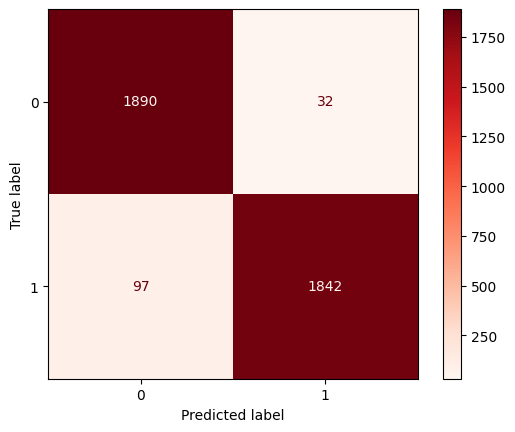

In [79]:
# Confussion Matrix
print('Confusion Matrix \n', ConfusionMatrixDisplay.from_estimator(grid_rf, X_test, y_test, cmap='Reds'));

#### VIII.III.IV. GradientBoostingClassifier

In [80]:
# Define Hyperparameters

param_grid_gbc = {  'n_estimators'      : [1, 16, 32, 64],
                    'max_depth'         : [2, 4, 8, 16],
                    'learning_rate'     : [1, 0.5, 0.1]}

In [81]:
# Train with Grid Search

grid_gbc = GridSearchCV(estimator=GradientBoostingClassifier(), 
                        param_grid=param_grid_gbc)

grid_gbc.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [1, 0.5, 0.1],
                         'max_depth': [2, 4, 8, 16],
                         'n_estimators': [1, 16, 32, 64]})

In [82]:
# Print best parameter after tuning
print(grid_gbc.best_params_)

# Print how our model looks after hyper-parameter tuning
print(grid_gbc.best_estimator_)

{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 64}
GradientBoostingClassifier(max_depth=8, n_estimators=64)


In [83]:
# Predict using selected hyper-parameter
grid_pred_train_gbc = grid_gbc.predict(X_train)

# Print classification report
print(classification_report(y_train, grid_pred_train_gbc))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      7729
           1       1.00      0.97      0.98      7712

    accuracy                           0.98     15441
   macro avg       0.98      0.98      0.98     15441
weighted avg       0.98      0.98      0.98     15441



In [84]:
# Predict using selected hyper-parameter
grid_pred_test_gbc = grid_gbc.predict(X_test)

# Print classification report
print(classification_report(y_test, grid_pred_test_gbc))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1922
           1       0.98      0.94      0.96      1939

    accuracy                           0.96      3861
   macro avg       0.96      0.96      0.96      3861
weighted avg       0.96      0.96      0.96      3861



Confusion Matrix 


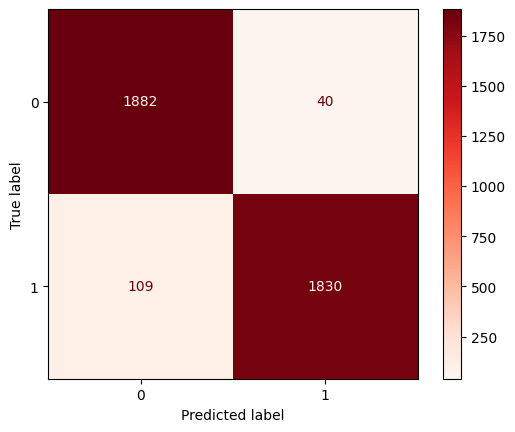

In [85]:
# Confussion Matrix
print('Confusion Matrix \n', ConfusionMatrixDisplay.from_estimator(grid_gbc, X_test, y_test, cmap='Reds'));

#### VIII.III.V. Result Analysis

Based on the results of hyperparameter tuning using GridSearchCV to the 4 models above, we can see that using hyperparameter tuning makes the 4 models above decrease in performance. So in this case, for the next step we will not use the hyperparameter tuning results.

## IX. Model Saving

In [86]:
# Save the files

with open('list_num_cols.txt', 'w') as file_1:
  json.dump(num_columns, file_1)

with open('list_cat_cols_1.txt', 'w') as file_2:
  json.dump(cat_columns_1, file_2)
  
with open('list_cat_cols_2.txt', 'w') as file_3:
  json.dump(cat_columns_2, file_3)

with open('list_cat_cols_3.txt', 'w') as file_4:
  json.dump(cat_columns_3, file_4)

with open('model_scaler.pkl', 'wb') as file_5:
  pickle.dump(scaler, file_5)

with open('model_encoder_1.pkl', 'wb') as file_6:
  pickle.dump(OHE_1, file_6)

with open('model_encoder_2.pkl', 'wb') as file_7:
  pickle.dump(OHE_2, file_7)

with open('model_encoder_3.pkl', 'wb') as file_8:
  pickle.dump(OHE_3, file_8)

with open('model_logreg.pkl', 'wb') as file_9:
  pickle.dump(lr, file_9)

with open('model_dtc.pkl', 'wb') as file_10:
  pickle.dump(dtc, file_10)
  
with open('model_rfc.pkl', 'wb') as file_11:
  pickle.dump(rfc, file_11)

with open('model_gbc.pkl', 'wb') as file_12:
  pickle.dump(gbc, file_12)

## X. Model Inference

This step can be seen in : h8dsft_P1M2_Theo_Inf.ipynb

## XI. Conclusion

Based on the classification report results, cross validation tests and hyperparameter tuning using GridSearchCV we can conclude that :

- Resampling method can be used for handling imbalance class and can make the performance of Logistic Regression model, Decision Tree Classifier, Random Forest Classifier and GradientBoosting Classifier more optimal.
- In this case, the Random Forest Classifier model can provide maximum performance without performing hyperparameter tuning. This is proven by the classification report results and cross validation tests.
- With a balanced class, all models can work optimally. This is evidenced by the classification report results above.
- With hyperparameter tuning, the results obtained can be better or even worse than the default parameters.

In general :

**Logistic Regression**:

- Type: Linear model (logistic regression).
- Principle: Using a logistic function to predict the probability of the target class.
- Pros: Simple, interpretable, works well for binary problems, can be used in multiclass cases.
- Disadvantages: Does not tend to perform well on datasets with non-linear features.


**DecisionTreeClassifier**:

- Type: Non-linear model (decision tree).
- Principle: Divide data into subsets based on rules at each node to make decisions.
- Pros: Can handle numerical and categorical data, easy to interpret, tends to handle non-linear features.
- Disadvantages: Tends to overfit if not well organized, inefficient for data with many features.

**RandomForestClassifier**:

- Type: Ensemble model (combination of decision trees).
- Principle: Build many decision trees randomly and combine their results.
- Pros: Reduces overfitting of DecisionTree, can cope with complex data, effective for data with many features.
- Disadvantages: Not as interpretable as DecisionTree, time-consuming parameter tuning.

**GradientBoostingClassifier**:

- Type: Ensemble model (combination of decision trees).
- Principle: Builds a decision tree based on the prediction error of the previous model, sequentially.
- Pros: Able to handle complex data, can provide excellent performance, effective in handling imbalanced data.
- Disadvantages: More complex in terms of tuning parameters and computation time.